# Investigate How Diffusivity Coefficient is Changed During Discharge

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constants
os.chdir(pybamm.__path__[0]+'/..')
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.


In [2]:
voltage_data_1C = pd.read_csv("pybamm/input/discharge_data/Ecker_1C.csv", header=None).to_numpy()
voltage_data_5C = pd.read_csv("pybamm/input/discharge_data/Ecker_5C.csv", header=None).to_numpy()

In [3]:
# choose DFN
model1 = pybamm.lithium_ion. DFN()
# choose SPMe
model2 = pybamm.lithium_ion. SPMe()

In [4]:
coin = {"particle shape":"negative coin"}

In [5]:
# choose SPMe coin
var = pybamm.standard_spatial_vars
model3 = pybamm.lithium_ion. SPMe(build=False, options=coin)
# add rho_n
model3.variables.update(
    {
        "rho_n": var.rho_n,
        "rho_n [m]": var.rho_n * model3.param.R_n,
    }
)
# delete r_n
model3.variables.pop('r_n', None)
model3.variables.pop('r_n [m]', None)
model3.build_model()

In [6]:
chemistry_new = pybamm.parameter_sets.Ecker2015_v2

## Spherical

In [7]:
parameter_values0s = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values0s.update({"Current function [A]": "[input]"})
parameter_values0s.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_original"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [8]:
parameter_values2s = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values2s.update({"Current function [A]": "[input]"})

In [9]:
parameter_values3s = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values3s.update({"Current function [A]": "[input]"})
parameter_values3s.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_up"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [10]:
parameter_values4s = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values4s.update({"Current function [A]": "[input]"})
parameter_values4s.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_4"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [11]:
var = pybamm.standard_spatial_vars
var_pts_n1 = {
    var.x_n: int(parameter_values0s.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values0s.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values0s.evaluate(model2.param.L_p / 1e-6)),
    var.r_n: int(parameter_values0s.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values0s.evaluate(model2.param.R_p / 1e-7)),
}
var_pts_n3 = {
    var.x_n: int(parameter_values0s.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values0s.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values0s.evaluate(model2.param.L_p / 1e-6)),
    var.r_n: 2000,
    var.r_p: 500,
}

In [12]:
sim_So = pybamm.Simulation(model2, parameter_values=parameter_values0s, var_pts=var_pts_n1)
sim_S2 = pybamm.Simulation(model2, parameter_values=parameter_values2s, var_pts=var_pts_n1)
sim_S3 = pybamm.Simulation(model2, parameter_values=parameter_values3s, var_pts=var_pts_n3)
sim_S4 = pybamm.Simulation(model2, parameter_values=parameter_values4s, var_pts=var_pts_n3)

In [13]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values0s["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_So = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_So.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_So[i] = sim_So.solution

In [14]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values2s["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_S2 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_S2.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_S2[i] = sim_S2.solution

In [15]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values3s["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_S3 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_S3.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_S3[i] = sim_S3.solution

In [16]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values4s["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_S4 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_S4.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_S4[i] = sim_S4.solution

In [17]:
def version1 (sto,T):
    
    D_ref = 5.07e-13 * np.exp(-17.56 * sto) + 1.68e-15
    E_D_s = 3.03e4
    arrhenius = np.exp(-E_D_s / (constants.R * T)) * np.exp(E_D_s / (constants.R * 296))

    return D_ref * arrhenius

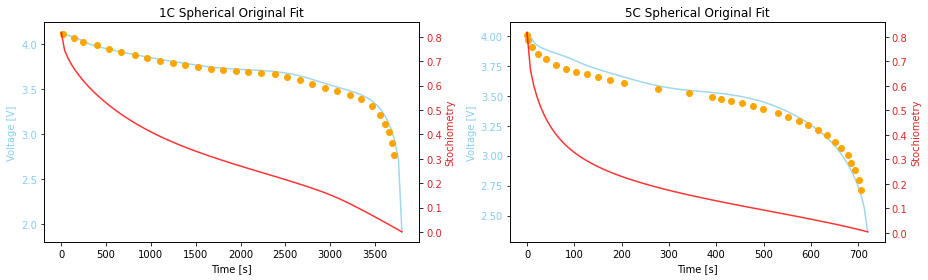

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Spherical results
t_sol_So = solutions_So[0]["Time [s]"].entries
ax1.plot(t_sol_So, solutions_So[0]["Terminal voltage [V]"](t_sol_So), label="original function", alpha=0.8, color="skyblue")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="skyblue")
ax1.tick_params(axis='y', labelcolor="skyblue")
ax1.set_title("1C Spherical Original Fit")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_So = solutions_So[0]["X-averaged negative particle surface concentration"](t_sol_So)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_So, c_sol_So, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Spherical results
t_sol_So = solutions_So[1]["Time [s]"].entries
ax2.plot(t_sol_So, solutions_So[1]["Terminal voltage [V]"](t_sol_So), label="original function", alpha=0.8, color="skyblue")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="skyblue")
ax2.tick_params(axis='y', labelcolor="skyblue")
ax2.set_title("5C Spherical Original Fit")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_So = solutions_So[1]["X-averaged negative particle surface concentration"](t_sol_So)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_So, c_sol_So, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax original spherical')
plt.show()

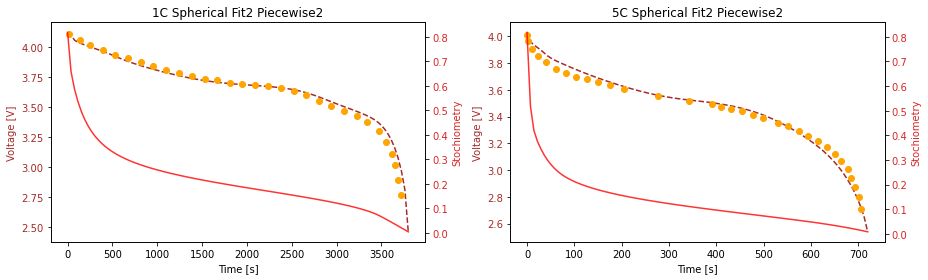

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Spherical results
t_sol_S2 = solutions_S2[0]["Time [s]"].entries
ax1.plot(t_sol_S2, solutions_S2[0]["Terminal voltage [V]"](t_sol_S2), label="exponential", linestyle="--", color="brown")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="brown")
ax1.tick_params(axis='y', labelcolor="brown")
ax1.set_title("1C Spherical Fit2 Piecewise2")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_S2 = solutions_S2[0]["X-averaged negative particle surface concentration"](t_sol_S2)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_S2, c_sol_S2, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Spherical results
t_sol_S2 = solutions_S2[1]["Time [s]"].entries
ax2.plot(t_sol_S2, solutions_S2[1]["Terminal voltage [V]"](t_sol_S2), label="exponential",linestyle="--", color="brown")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="brown")
ax2.tick_params(axis='y', labelcolor="brown")
ax2.set_title("5C Spherical Fit2 Piecewise2")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_S2 = solutions_S2[1]["X-averaged negative particle surface concentration"](t_sol_S2)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_S2, c_sol_S2, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax fit2 piecewise1 spherical')
plt.show()

2020-08-20 13:59:19,917 - [WARNING] processed_variable.__call__(510): Calling variable outside interpolation range (returns 'nan')


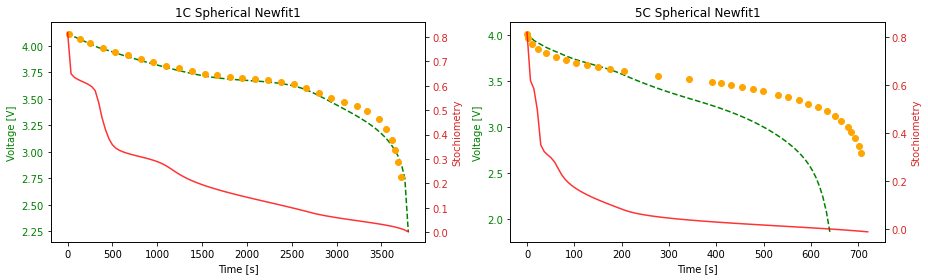

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Spherical results
t_sol_S3 = solutions_S3[0]["Time [s]"].entries
ax1.plot(t_sol_S3, solutions_S3[0]["Terminal voltage [V]"](t_sol_S3), label="exponential", linestyle="--", color="green")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="green")
ax1.tick_params(axis='y', labelcolor="green")
ax1.set_title("1C Spherical Newfit1")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_S3 = solutions_S3[0]["X-averaged negative particle surface concentration"](t_sol_S3)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_S3, c_sol_S3, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Spherical results
t_sol_S3 = solutions_S3[1]["Time [s]"].entries
ax2.plot(t_sol_S3, solutions_S3[1]["Terminal voltage [V]"](t_sol_S3), label="exponential",linestyle="--", color="green")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_title("5C Spherical Newfit1")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_S3 = solutions_S3[1]["X-averaged negative particle surface concentration"](t_sol_S3)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_S3, c_sol_S3, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax fit2 piecewise2 spherical')
plt.show()

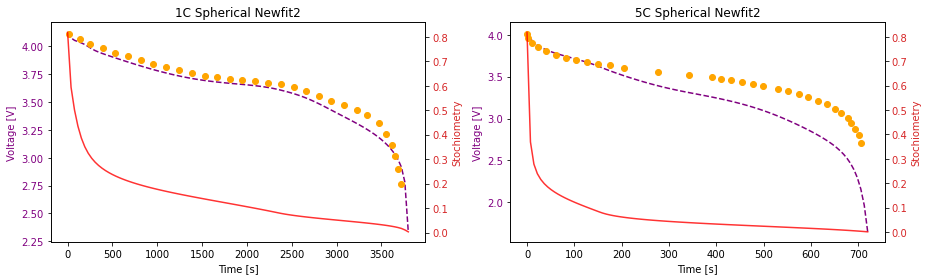

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Spherical results
t_sol_S4 = solutions_S4[0]["Time [s]"].entries
ax1.plot(t_sol_S4, solutions_S4[0]["Terminal voltage [V]"](t_sol_S4), label="exponential", linestyle="--", color="purple")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="purple")
ax1.tick_params(axis='y', labelcolor="purple")
ax1.set_title("1C Spherical Newfit2")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_S4 = solutions_S4[0]["X-averaged negative particle surface concentration"](t_sol_S4)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_S4, c_sol_S4, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Spherical results
t_sol_S4 = solutions_S4[1]["Time [s]"].entries
ax2.plot(t_sol_S4, solutions_S4[1]["Terminal voltage [V]"](t_sol_S4), label="exponential",linestyle="--", color="purple")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="purple")
ax2.tick_params(axis='y', labelcolor="purple")
ax2.set_title("5C Spherical Newfit2")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_S4 = solutions_S4[1]["X-averaged negative particle surface concentration"](t_sol_S4)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_S4, c_sol_S4, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax fit2 piecewise2 spherical')
plt.show()

In [22]:
solutions_S4[0]["X-averaged negative particle surface concentration"](t_sol_S4)

array([0.81829731, 0.77578403, 0.73327075, 0.69075747, 0.64824419,
       0.60573091, 0.58124175, 0.56368495, 0.54612815, 0.52857135,
       0.51101455, 0.49565971, 0.48305732, 0.47045493, 0.45785254,
       0.44525015, 0.4332097 , 0.42397889, 0.41474809, 0.40551728,
       0.39628648, 0.38705567, 0.38003586, 0.37329242, 0.36654899,
       0.35980555, 0.35306211, 0.347377  , 0.34236536, 0.33735373,
       0.3323421 , 0.32733047, 0.32270668, 0.31885859, 0.3150105 ,
       0.31116241, 0.30731433, 0.30350973, 0.30044443, 0.29737914,
       0.29431384, 0.29124855, 0.28818326, 0.28554446, 0.28302752,
       0.28051058, 0.27799364, 0.2754767 , 0.27315704, 0.27103467,
       0.2689123 , 0.26678993, 0.26466755, 0.2626104 , 0.26078153,
       0.25895267, 0.2571238 , 0.25529493, 0.25346606, 0.25184868,
       0.25024374, 0.2486388 , 0.24703386, 0.24542892, 0.24394083,
       0.24251117, 0.24108151, 0.23965185, 0.23822219, 0.23684693,
       0.23555717, 0.2342674 , 0.23297764, 0.23168788, 0.23041

## Coin

In [23]:
parameter_values0c = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values0c.update({"Current function [A]": "[input]"})
parameter_values0c.update({"Negative particle radius [m]": 4.5e-05})
parameter_values0c.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin_original"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [24]:
parameter_values2c = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values2c.update({"Current function [A]": "[input]"})
parameter_values2c.update({"Negative particle radius [m]": 2.1e-05})
parameter_values2c.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [25]:
parameter_values3c = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values3c.update({"Current function [A]": "[input]"})
parameter_values3c.update({"Negative particle radius [m]": 2.1e-05})
parameter_values3c.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin_up"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [26]:
parameter_values4c = pybamm.ParameterValues(chemistry=chemistry_new)
parameter_values4c.update({"Current function [A]": "[input]"})
parameter_values4c.update({"Negative particle radius [m]": 2.3e-05})
parameter_values4c.update({"Negative electrode diffusivity [m2.s-1]": "[function]graphite_diffusivity_Ecker2015_coin_4"},
                        path="pybamm/input/parameters/lithium-ion/anodes/" + chemistry_new['anode'])

In [27]:
var = pybamm.standard_spatial_vars
var_pts_n2 = {
    var.x_n: int(parameter_values0c.evaluate(model3.param.L_n / 1e-6)),
    var.x_s: int(parameter_values0c.evaluate(model3.param.L_s / 1e-6)),
    var.x_p: int(parameter_values0c.evaluate(model3.param.L_p / 1e-6)),
    var.rho_n: int(parameter_values0c.evaluate(model3.param.R_n / 1e-7)),
    var.r_p: int(parameter_values0c.evaluate(model3.param.R_p / 1e-7)),
}

In [28]:
sim_Co =  pybamm.Simulation(model3, parameter_values=parameter_values0c, var_pts=var_pts_n2, geometry=pybamm.battery_geometry(coin_geometry=True))
sim_C2 =  pybamm.Simulation(model3, parameter_values=parameter_values2c, var_pts=var_pts_n2, geometry=pybamm.battery_geometry(coin_geometry=True))
sim_C3 =  pybamm.Simulation(model3, parameter_values=parameter_values3c, var_pts=var_pts_n2, geometry=pybamm.battery_geometry(coin_geometry=True))
sim_C4 =  pybamm.Simulation(model3, parameter_values=parameter_values4c, var_pts=var_pts_n2, geometry=pybamm.battery_geometry(coin_geometry=True))

In [29]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values0c["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_Co = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_Co.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_Co[i] = sim_Co.solution

In [30]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values2c["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_C2 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_C2.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_C2[i] = sim_C2.solution

In [31]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values3c["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_C3 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_C3.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_C3[i] = sim_C3.solution

In [32]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values4c["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions_C4 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim_C4.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions_C4[i] = sim_C4.solution

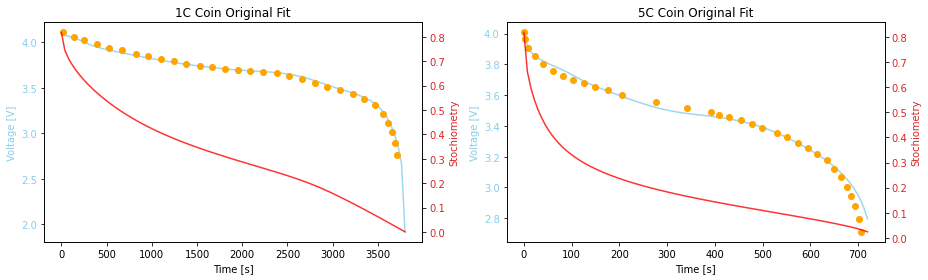

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Coin results
t_sol_Co = solutions_Co[0]["Time [s]"].entries
ax1.plot(t_sol_Co, solutions_Co[0]["Terminal voltage [V]"](t_sol_Co), label="original function", alpha=0.8, color="skyblue")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="skyblue")
ax1.tick_params(axis='y', labelcolor="skyblue")
ax1.set_title("1C Coin Original Fit")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_Co = solutions_Co[0]["X-averaged negative particle surface concentration"](t_sol_Co)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_Co, c_sol_Co, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Coin results
t_sol_Co = solutions_Co[1]["Time [s]"].entries
ax2.plot(t_sol_Co, solutions_Co[1]["Terminal voltage [V]"](t_sol_Co), label="original function", alpha=0.8, color="skyblue")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="skyblue")
ax2.tick_params(axis='y', labelcolor="skyblue")
ax2.set_title("5C Coin Original Fit")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_Co = solutions_Co[1]["X-averaged negative particle surface concentration"](t_sol_Co)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_Co, c_sol_Co, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax original coin')
plt.show()

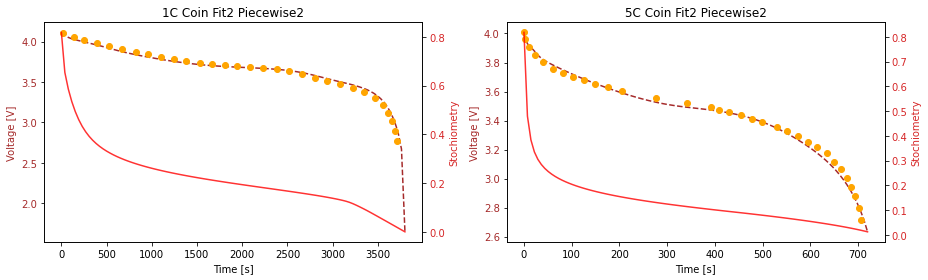

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Coin results
t_sol_C2 = solutions_C2[0]["Time [s]"].entries
ax1.plot(t_sol_C2, solutions_C2[0]["Terminal voltage [V]"](t_sol_C2), label="exponential", linestyle="--", color="brown")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="brown")
ax1.tick_params(axis='y', labelcolor="brown")
ax1.set_title("1C Coin Fit2 Piecewise2")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_C2 = solutions_C2[0]["X-averaged negative particle surface concentration"](t_sol_C2)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_C2, c_sol_C2, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Coin results
t_sol_C2 = solutions_C2[1]["Time [s]"].entries
ax2.plot(t_sol_C2, solutions_C2[1]["Terminal voltage [V]"](t_sol_C2), label="exponential",linestyle="--", color="brown")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="brown")
ax2.tick_params(axis='y', labelcolor="brown")
ax2.set_title("5C Coin Fit2 Piecewise2")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_C2 = solutions_C2[1]["X-averaged negative particle surface concentration"](t_sol_C2)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_C2, c_sol_C2, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax fit2 piecewise1 coin')
plt.show()

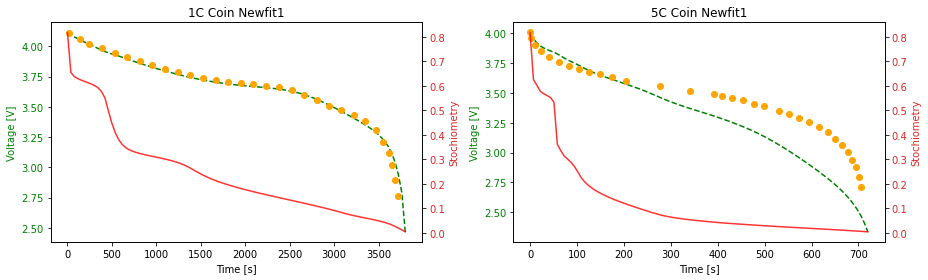

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Coin results
t_sol_C3 = solutions_C3[0]["Time [s]"].entries
ax1.plot(t_sol_C3, solutions_C3[0]["Terminal voltage [V]"](t_sol_C3), label="exponential", linestyle="--", color="green")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="green")
ax1.tick_params(axis='y', labelcolor="green")
ax1.set_title("1C Coin Newfit1")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_C3 = solutions_C3[0]["X-averaged negative particle surface concentration"](t_sol_C3)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_C3, c_sol_C3, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Coin results
t_sol_C3 = solutions_C3[1]["Time [s]"].entries
ax2.plot(t_sol_C3, solutions_C3[1]["Terminal voltage [V]"](t_sol_C3), label="exponential",linestyle="--", color="green")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_title("5C Coin Newfit1")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_C3 = solutions_C3[1]["X-averaged negative particle surface concentration"](t_sol_C3)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_C3, c_sol_C3, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax fit2 piecewise2 coin')
plt.show()

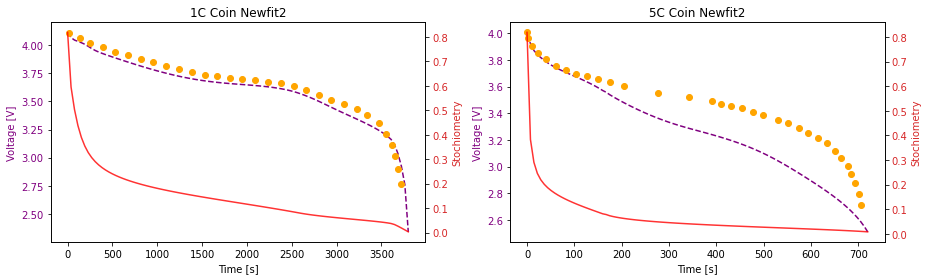

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C Coin results
t_sol_C4 = solutions_C4[0]["Time [s]"].entries
ax1.plot(t_sol_C4, solutions_C4[0]["Terminal voltage [V]"](t_sol_C4), label="exponential", linestyle="--", color="purple")
ax1.plot(voltage_data_1C[:,0], voltage_data_1C[:,1], "o", color='orange')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]",color="purple")
ax1.tick_params(axis='y', labelcolor="purple")
ax1.set_title("1C Coin Newfit2")
#ax1.legend(loc="best")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_C4 = solutions_C4[0]["X-averaged negative particle surface concentration"](t_sol_C4)
ax3.set_ylabel("Stochiometry",color=color)
ax3.plot(t_sol_C4, c_sol_C4, alpha=0.8, color="red")
ax3.tick_params(axis='y', labelcolor=color)

# plot the 5C Coin results
t_sol_C4 = solutions_C4[1]["Time [s]"].entries
ax2.plot(t_sol_C4, solutions_C4[1]["Terminal voltage [V]"](t_sol_C4), label="exponential",linestyle="--", color="purple")
ax2.plot(voltage_data_5C[:,0], voltage_data_5C[:,1], "o", color='orange')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]",color="purple")
ax2.tick_params(axis='y', labelcolor="purple")
ax2.set_title("5C Coin Newfit2")
#ax2.legend(loc="best")

ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
c_sol_C4 = solutions_C4[1]["X-averaged negative particle surface concentration"](t_sol_C4)
ax4.set_ylabel("Stochiometry",color=color)
ax4.plot(t_sol_C4, c_sol_C4, alpha=0.8, color="red")
ax4.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
#plt.savefig('3ax fit2 piecewise3 coin')
plt.show()